# [CM2] Representation Learning

importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Loading The dataset
covid_data = pd.read_csv("cleaned_normalized_coviddata.csv")

In [3]:
covid_data.head(5)

,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,-1.178243,0.304476,-0.200641,0.143976,-0.483393,-0.475230,-1.301745,-0.128579,-0.217013,0.118745,-1.168255,True,False,False
1,2,2,3.607611,-3.031933,-0.448967,-0.290209,-0.569371,-1.797949,2.071154,-0.754174,-0.276752,1.614369,3.491260,True,True,False
2,2,3,-0.945708,-0.944926,0.389043,0.088511,-0.007491,0.075713,-1.268952,0.181561,-0.239163,0.508908,0.384916,True,True,True
3,2,4,-0.741458,0.025816,-0.482359,0.202178,-0.456457,-0.029941,-0.559153,-0.422031,-0.242214,0.573935,-0.546987,True,True,True
4,2,5,-0.552594,-1.365168,4.275448,-0.502417,4.022089,-0.791062,-0.177543,4.903416,-0.122735,-0.921689,0.384916,True,True,False


In [4]:
#selecting features that will be used for PCA analysis.
normalized_dataset = covid_data[['Lat','Long_','Active','Incident_Rate','Total_Test_Results','Case_Fatality_Ratio',
            'Testing_Rate','Resident Population 2020 Census','Population Density 2020 Census',
            'Density Rank 2020 Census','SexRatio']]

## PCA Analysis

In [5]:
# All the features are selected so that the scree plot can be plotted
pca = PCA(n_components = 11)

In [26]:
pca_features = pca.fit_transform(normalized_dataset)
pca_features.shape

(1380, 11)

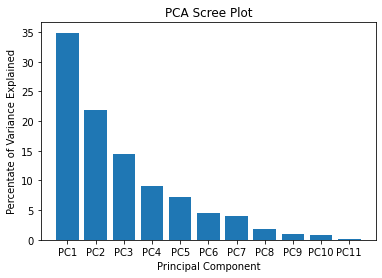

In [27]:
#Plotting the Scree Plot
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
plt.bar(x= range(1,12), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()


In [28]:
percent_variance

array([34.9 , 21.95, 14.54,  9.11,  7.29,  4.46,  4.03,  1.83,  1.01,
        0.73,  0.17])

### The PCA scree plot shows the contribution of each feature to the total features. The first 3 features contributes to almost 70% of the dataset. Thus 3 features from PCA are used in random forest and gradient boosting.

In [29]:
# exporting the pca_feartures array so that it can be used in the other notebooks
%store pca_features

Stored 'pca_features' (ndarray)


Text(0, 0.5, 'PCA 2')

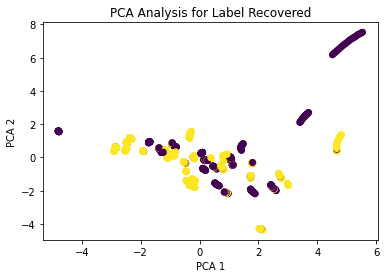

In [51]:
plt.scatter(pca_features[:,0],pca_features[:,1],c=covid_data.loc[:,'Recovered'])
plt.title('PCA Analysis for Label Recovered')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

### The PCA analysis creates features based on variance which can be seen from the scatter plot( There dataset is not classified).

## LDA

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

In [20]:
# the n_components value = no of classes - 1 
lda = LinearDiscriminantAnalysis(n_components = 1)

In [34]:
# The lda analysis is done for all the 3 labels
lda_recovered = lda.fit(normalized_dataset,covid_data.loc[:,'Recovered'])
recovered = lda.fit_transform(normalized_dataset,covid_data.loc[:,'Recovered'])
lda_deaths = lda.fit(normalized_dataset,covid_data.loc[:,'Deaths'])
deaths = lda.fit_transform(normalized_dataset,covid_data.loc[:,'Deaths'])
lda_confirmed = lda.fit(normalized_dataset,covid_data.loc[:,'Confirmed'])
confirmed = lda.fit_transform(normalized_dataset,covid_data.loc[:,'Confirmed'])

In [35]:
# Calculating accuracies for different labels 
score_recovered = cross_val_score(lda_recovered,normalized_dataset,covid_data.loc[:,'Recovered'],cv = 10)
print("The average accuracy of LDA for recovered label is:",score_recovered.mean())
score_deaths = cross_val_score(lda_deaths,normalized_dataset,covid_data.loc[:,'Deaths'],cv = 10)
print("The average accuracy of LDA for Death label is:",score_deaths.mean())
score_confirmed = cross_val_score(lda_confirmed,normalized_dataset,covid_data.loc[:,'Confirmed'],cv = 10)
print("The average accuracy of LDA for confirmed label is:",score_confirmed.mean())


The average accuracy of LDA for recovered label is: 0.782608695652174
The average accuracy of LDA for Death label is: 0.8905797101449275
The average accuracy of LDA for confirmed label is: 0.9594202898550724


### From the above accuracy values we can observe that LDA analysis for confirmed Label gives the highest accuracy.

Text(0.5, 1.0, 'Confirmed')

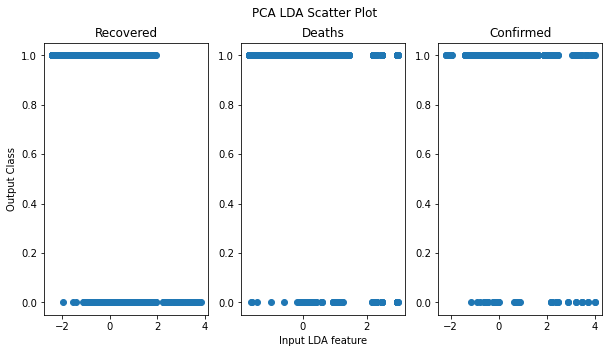

In [48]:
figure,axis = plt.subplots(1,3,figsize=(10,5))
axis[0].scatter(recovered[:,0],y=covid_data.loc[:,'Recovered'])
axis[1].scatter(deaths,y=covid_data.loc[:,'Deaths'])
axis[2].scatter(confirmed,y=covid_data.loc[:,'Confirmed'])
figure.suptitle('PCA LDA Scatter Plot')
axis[1].set_xlabel('Input LDA feature')
axis[0].set_ylabel('Output Class')
axis[0].set_title('Recovered')
axis[1].set_title('Deaths')
axis[2].set_title('Confirmed')

###  Both the LDA and PCA can be used for feature extraction .The difference between them can be seen by comparing their scatter plots. The scatter plot of LDA shows that the datapoints are split into two classes and the feature columns of LDA analysis are formed accordingly. The scatter plot of PCA shows that the datapoints are not categorized but are clustered around high variance.